## Carga Inicial y Exploración de datos

In [1]:
import h5py
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [2]:
from pyhdf.SD import SD, SDC

file_path = "./AIRS.2005.01.01.L3.RetStd_IR001.v7.0.3.0.G20168111708.hdf"
hdf = SD(file_path, SDC.READ)

# Print available datasets
print("Datasets:")
for dataset in hdf.datasets():
    print(f"- {dataset}, Shape: {hdf.select(dataset).info()[0]}")

Datasets:
- TotalCounts_A, Shape: TotalCounts_A
- SurfPres_Forecast_A, Shape: SurfPres_Forecast_A
- SurfPres_Forecast_A_ct, Shape: SurfPres_Forecast_A_ct
- SurfPres_Forecast_A_sdev, Shape: SurfPres_Forecast_A_sdev
- SurfSkinTemp_A, Shape: SurfSkinTemp_A
- SurfSkinTemp_A_ct, Shape: SurfSkinTemp_A_ct
- SurfSkinTemp_A_sdev, Shape: SurfSkinTemp_A_sdev
- EmisIR_A, Shape: EmisIR_A
- EmisIR_A_ct, Shape: EmisIR_A_ct
- EmisIR_A_sdev, Shape: EmisIR_A_sdev
- Temperature_A, Shape: Temperature_A
- Temperature_A_ct, Shape: Temperature_A_ct
- Temperature_A_sdev, Shape: Temperature_A_sdev
- SurfAirTemp_A, Shape: SurfAirTemp_A
- SurfAirTemp_A_ct, Shape: SurfAirTemp_A_ct
- SurfAirTemp_A_sdev, Shape: SurfAirTemp_A_sdev
- TropPres_A, Shape: TropPres_A
- TropPres_A_ct, Shape: TropPres_A_ct
- TropPres_A_sdev, Shape: TropPres_A_sdev
- TropTemp_A, Shape: TropTemp_A
- TropTemp_A_ct, Shape: TropTemp_A_ct
- TropTemp_A_sdev, Shape: TropTemp_A_sdev
- TotH2OVap_A, Shape: TotH2OVap_A
- TotH2OVap_A_ct, Shape: TotH2OV

In [3]:
hdf = SD(file_path, SDC.READ)

# Extract Cloud Fraction for Ascending Orbit
cloud_fraction = hdf.select("CloudFrc_A")[:]

print("Cloud Fraction (Ascending):")
print(cloud_fraction)
print("Shape:", cloud_fraction.shape)

Cloud Fraction (Ascending):
[[-9.9990000e+03 -9.9990000e+03 -9.9990000e+03 ... -9.9990000e+03
  -9.9990000e+03 -9.9990000e+03]
 [ 4.3945312e-01  4.8632812e-01  2.2460938e-01 ...  5.7421875e-01
   1.8945312e-01 -9.9990000e+03]
 [ 7.6171875e-01  5.8984375e-01  6.6796875e-01 ...  2.4902344e-02
   1.8457031e-01  2.8515625e-01]
 ...
 [ 5.0000000e-01  0.0000000e+00  3.3398438e-01 ...  2.5585938e-01
  -9.9990000e+03  1.7944336e-02]
 [-9.9990000e+03 -9.9990000e+03  0.0000000e+00 ...  3.2812500e-01
   3.2226562e-01 -9.9990000e+03]
 [ 0.0000000e+00  0.0000000e+00 -9.9990000e+03 ... -9.9990000e+03
  -9.9990000e+03  0.0000000e+00]]
Shape: (180, 360)


## Visualización data

In [4]:
def plot_cf_map(cf_data):
    """Plots the ozone data on a global map."""
    # Handle missing values (replace -9999 or similar with NaN)
    cf_data = np.where(cf_data < 0, np.nan, cf_data)

    # Create latitude and longitude grids
    lons = np.linspace(-180, 180, cf_data.shape[1])  # Longitudes
    lats = np.linspace(90, -90, cf_data.shape[0])    # Latitudes
    lon_grid, lat_grid = np.meshgrid(lons, lats)

    # Create the map
    fig = plt.figure(figsize=(12, 6))
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.set_title("CF Index", fontsize=14)

    # Add features
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS, linestyle=":")
    ax.add_feature(cfeature.LAND, edgecolor="black", facecolor="lightgray")
    ax.set_global()

    # Plot the ozone data
    c = ax.pcolormesh(lon_grid, lat_grid, cf_data, shading="auto", cmap="Blues_r", transform=ccrs.PlateCarree())
    
    # Add a colorbar
    cb = plt.colorbar(c, orientation="horizontal", pad=0.05)
    cb.set_label("CF Index")  # Adjust based on actual units

    plt.show()

In [82]:
def plot_cf_map_uruguay(cf_data):
    """Plots the ozone data, zoomed in on Uruguay."""
    # Handle missing values (replace -9999 or similar with NaN)
    cf_data = np.where(cf_data < 0, np.nan, cf_data)

    # Create latitude and longitude grids
    lons = np.linspace(-180, 180, cf_data.shape[1])  # Longitudes
    lats = np.linspace(90, -90, cf_data.shape[0])    # Latitudes
    lon_grid, lat_grid = np.meshgrid(lons, lats)
    
    # Create the map
    fig = plt.figure(figsize=(10, 6))
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.set_title("UV Index", fontsize=14)

    # Add features
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS, linestyle=":")
    ax.add_feature(cfeature.LAND, edgecolor="black", facecolor="lightgray")

    # Zoom into Uruguay
    ax.set_extent([-58.5, -53, -35.1, -30.1], crs=ccrs.PlateCarree())

    # Plot the ozone data
    c = ax.pcolormesh(lon_grid, lat_grid, cf_data, shading="auto", cmap="Blues_r", transform=ccrs.PlateCarree())
    
    # Add a colorbar
    cb = plt.colorbar(c, orientation="horizontal", pad=0.05)
    cb.set_label("Index level")  # Adjust based on actual units

    plt.show()

In [83]:
hdf = SD(file_path, SDC.READ)
cloud_fraction_a = hdf.select("CloudFrc_A")[:]

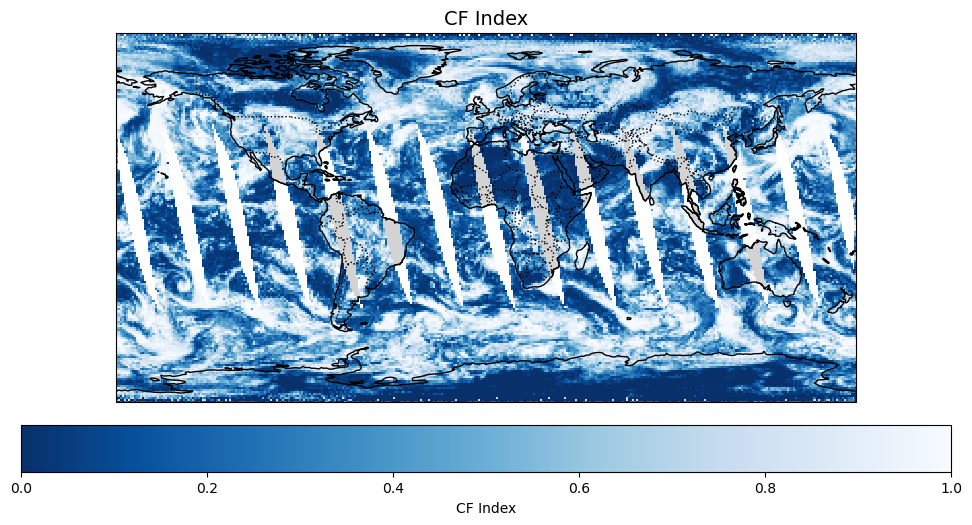

In [84]:
plot_cf_map(cloud_fraction_a)

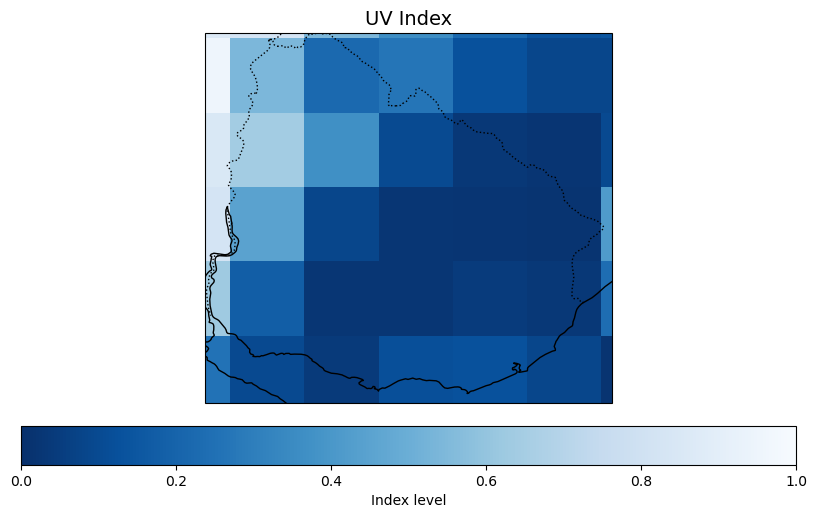

In [85]:
plot_cf_map_uruguay(cloud_fraction_a)

## Comparación con archivo extraido manualmente

Data de Giovanni

In [51]:
from netCDF4 import Dataset

nc_data = Dataset('g4.timeAvgMap.AIRS3STD_7_0_CloudFrc_A.20050101-20050101.58W_35S_53W_30S.nc', 'r')
cloud_friction_data = nc_data.variables['AIRS3STD_7_0_CloudFrc_A'][:, :]

# Giovanni's lat and lon grid (adjust to match your actual region)
giovanni_lats = nc_data.variables['lat'][:]      # 5 lat values
giovanni_lons = nc_data.variables['lon'][:]      # 6 lon values

print(cloud_friction_data)

[[0.25390625 0.09619141 0.04125977 0.12011719 0.12792969 0.08544922]
 [0.625      0.17578125 0.02612305 0.02624512 0.04467773 0.03222656]
 [0.8203125  0.44726562 0.08447266 0.02722168 0.02185059 0.01647949]
 [0.84765625 0.63671875 0.3671875  0.09765625 0.03295898 0.02197266]
 [0.94921875 0.5390625  0.21972656 0.265625   0.12597656 0.08496094]]


Data original

In [44]:
# Cargamos la data original
cf_data = hdf.select("CloudFrc_A")[:]
cf_data = np.where(cf_data < 0, np.nan, cf_data)

# Buscamos por 2 valores que conocemos del archivo de Giovanni
for i in range(cf_data.shape[0]):
    for j in range(cf_data.shape[1]):
        if cf_data[i,j] == np.float32(0.25390625) and round(cf_data[i,j + 1],4) == round(np.float32(0.09619141),4):
            print(i,j)

124 121


In [92]:
# Los datos estan al revez!
print(cf_data[120:125,121:127])

[[0.94921875 0.5390625  0.21972656 0.265625   0.12597656 0.08496094]
 [0.84765625 0.63671875 0.3671875  0.09765625 0.03295898 0.02197266]
 [0.8203125  0.44726562 0.08447266 0.02722168 0.02185059 0.01647949]
 [0.625      0.17578125 0.02612305 0.02624512 0.04467773 0.03222656]
 [0.25390625 0.09619141 0.04125977 0.12011719 0.12792969 0.08544922]]


In [95]:
data_to_get = cf_data[120:125,121:127]

Vemos la data descargada por coordenadas

In [89]:
for lat in range(len(giovanni_lats)):
    for lon in range(len(giovanni_lons)):
        print(giovanni_lats[lat],giovanni_lons[lon], cloud_friction_data[lat, lon])

-34.5 -58.5 0.25390625
-34.5 -57.5 0.096191406
-34.5 -56.5 0.041259766
-34.5 -55.5 0.12011719
-34.5 -54.5 0.12792969
-34.5 -53.5 0.08544922
-33.5 -58.5 0.625
-33.5 -57.5 0.17578125
-33.5 -56.5 0.026123047
-33.5 -55.5 0.026245117
-33.5 -54.5 0.044677734
-33.5 -53.5 0.032226562
-32.5 -58.5 0.8203125
-32.5 -57.5 0.44726562
-32.5 -56.5 0.084472656
-32.5 -55.5 0.02722168
-32.5 -54.5 0.021850586
-32.5 -53.5 0.016479492
-31.5 -58.5 0.84765625
-31.5 -57.5 0.63671875
-31.5 -56.5 0.3671875
-31.5 -55.5 0.09765625
-31.5 -54.5 0.032958984
-31.5 -53.5 0.021972656
-30.5 -58.5 0.94921875
-30.5 -57.5 0.5390625
-30.5 -56.5 0.21972656
-30.5 -55.5 0.265625
-30.5 -54.5 0.12597656
-30.5 -53.5 0.08496094


Como se vería en nuestro archivo original:

In [104]:
X = []
for lat in range(len(giovanni_lats)):
    for lon in range(len(giovanni_lons)):
        x = []
        print(giovanni_lats[lat],giovanni_lons[lon], data_to_get[len(giovanni_lats) - 1 - lat, lon])
        x.append(giovanni_lats[lat])
        x.append(giovanni_lons[lon])
        x.append(data_to_get[len(giovanni_lats) - 1 - lat, lon])
        X.append(x)
        
X = np.asarray(X)

-34.5 -58.5 0.25390625
-34.5 -57.5 0.096191406
-34.5 -56.5 0.041259766
-34.5 -55.5 0.12011719
-34.5 -54.5 0.12792969
-34.5 -53.5 0.08544922
-33.5 -58.5 0.625
-33.5 -57.5 0.17578125
-33.5 -56.5 0.026123047
-33.5 -55.5 0.026245117
-33.5 -54.5 0.044677734
-33.5 -53.5 0.032226562
-32.5 -58.5 0.8203125
-32.5 -57.5 0.44726562
-32.5 -56.5 0.084472656
-32.5 -55.5 0.02722168
-32.5 -54.5 0.021850586
-32.5 -53.5 0.016479492
-31.5 -58.5 0.84765625
-31.5 -57.5 0.63671875
-31.5 -56.5 0.3671875
-31.5 -55.5 0.09765625
-31.5 -54.5 0.032958984
-31.5 -53.5 0.021972656
-30.5 -58.5 0.94921875
-30.5 -57.5 0.5390625
-30.5 -56.5 0.21972656
-30.5 -55.5 0.265625
-30.5 -54.5 0.12597656
-30.5 -53.5 0.08496094


In [105]:
df = pd.DataFrame(X, columns = ['Latitude','Longitude','CloudFraction'])

fecha = ''.join(file_path.split('.')[2:5])

df['Fecha'] = fecha

In [113]:
df

,Latitude,Longitude,CloudFraction,Fecha
0,-34.5,-58.5,0.253906,20050101
1,-34.5,-57.5,0.096191,20050101
2,-34.5,-56.5,0.041260,20050101
3,-34.5,-55.5,0.120117,20050101
4,-34.5,-54.5,0.127930,20050101
5,-34.5,-53.5,0.085449,20050101
6,-33.5,-58.5,0.625000,20050101
7,-33.5,-57.5,0.175781,20050101
8,-33.5,-56.5,0.026123,20050101
9,-33.5,-55.5,0.026245,20050101


In [101]:
giovanni_lats

masked_array(data=[-34.5, -33.5, -32.5, -31.5, -30.5],
             mask=False,
       fill_value=1e+20)

In [102]:
giovanni_lons

masked_array(data=[-58.5, -57.5, -56.5, -55.5, -54.5, -53.5],
             mask=False,
       fill_value=1e+20)

In [128]:
os.remove("demofile.txt")